# BOSTON HOUSING DATASET
The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:
- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq. ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centers
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per \\$10,000
- PTRATIO - pupil-teacher ratio by town
- B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in $1000's

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
import sklearn.metrics as mt
from sklearn.model_selection import train_test_split

sns.set_style('whitegrid')
%matplotlib inline

In [2]:
df_train = pd.read_csv('Boston_Train.csv', index_col=0)
df_test = pd.read_csv('Boston_Test.csv - Boston_Test.csv.csv', index_col=0)

In [3]:
df_train.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
df_test.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
351,0.07950,60,1.69,0,0.411,6.579,35.9,10.7103,4,411,18.3,370.78,5.49,24.1
352,0.07244,60,1.69,0,0.411,5.884,18.5,10.7103,4,411,18.3,392.33,7.79,18.6
353,0.01709,90,2.02,0,0.410,6.728,36.1,12.1265,5,187,17.0,384.46,4.50,30.1
354,0.04301,80,1.91,0,0.413,5.663,21.9,10.5857,4,334,22.0,382.80,8.05,18.2
355,0.10659,80,1.91,0,0.413,5.936,19.5,10.5857,4,334,22.0,376.04,5.57,20.6


In [5]:
df = pd.concat([df_train, df_test])

In [6]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


# EDA

In [7]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

No Column has any null value

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 59.3 KB


All columns are numerical

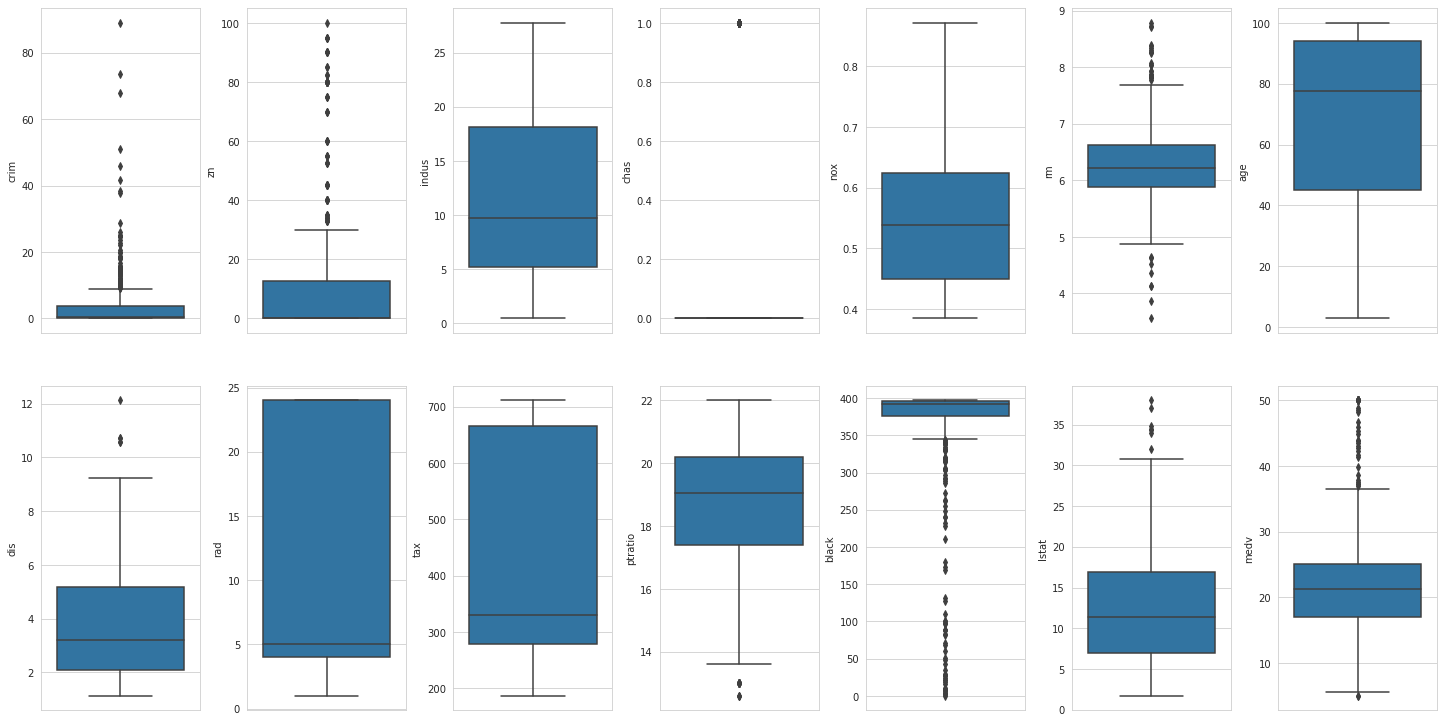

In [10]:
# Box PLots
fig, axes = plt.subplots(nrows=2, ncols=7, figsize=(20,10))
index = 0
axs = axes.flatten()

for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

Columns CRIM, BLACK & ZN has large number of outliers, if these outliers aren't dealt than they can affect Model accuracy.

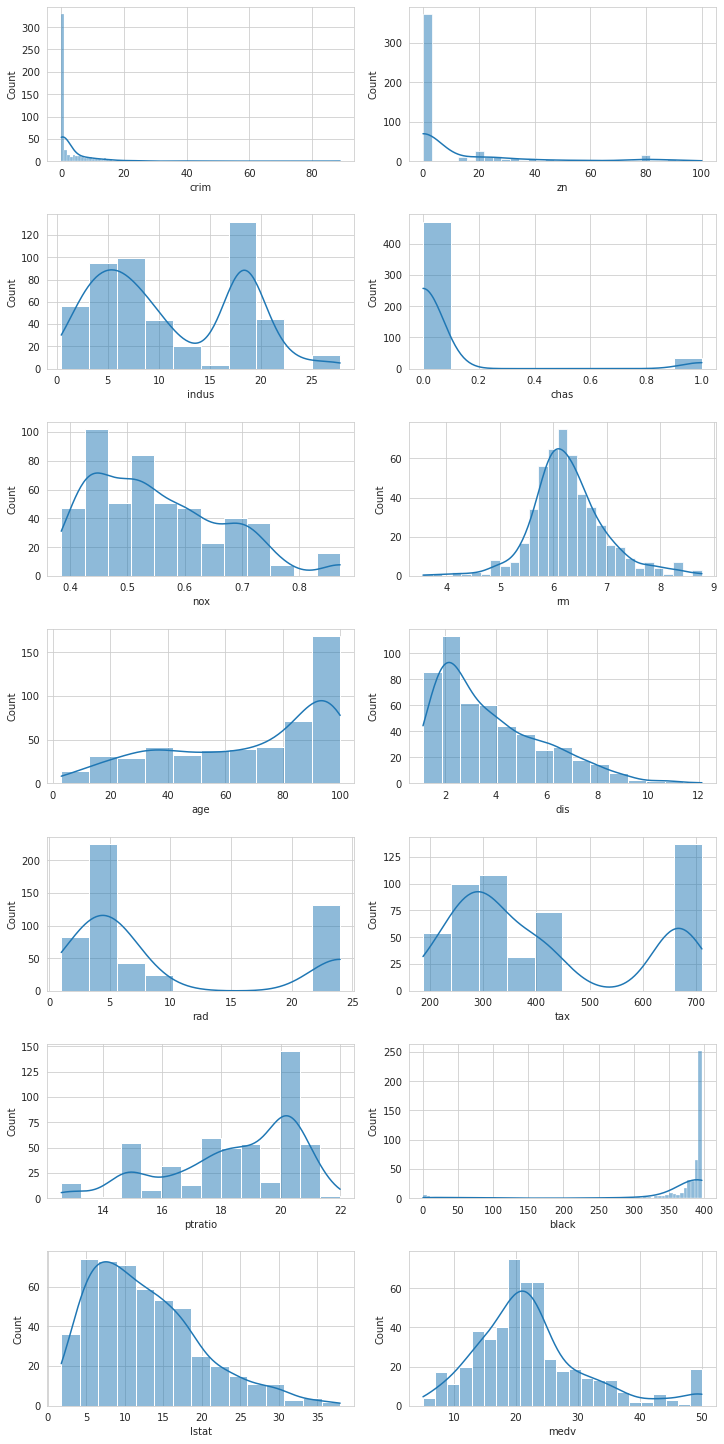

In [11]:
# DISTPLOT
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(10,20))
index = 0
axs = axes.flatten()

for col, value in df.items():
    sns.histplot(value, ax=axs[index], kde=True)
    index += 1
plt.tight_layout(pad=0.5, w_pad=1.0, h_pad=2.0)

MEDV - Target Column, shows a normal distribution with few outliers.
The Columns [Black, tax, crim, zn] shows distribution over a wide range of data. This has to be normalized, this can be done by either taking log of values or using MinMax

# PRE-PROCESSING

In [12]:
scaler = MinMaxScaler()
scaler.fit(df[['crim', 'zn', 'tax', 'black']])
df[['crim', 'zn', 'tax', 'black']] = scaler.transform(df[['crim', 'zn', 'tax', 'black']])

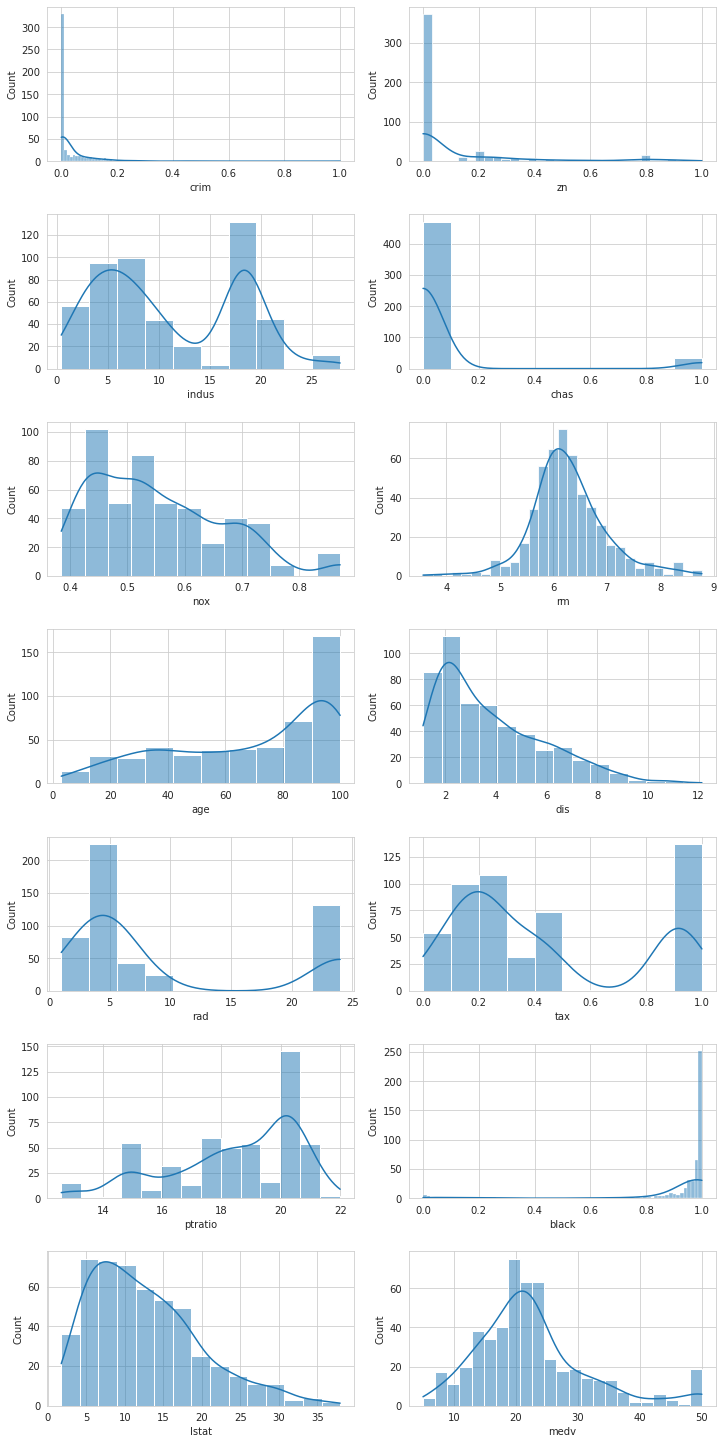

In [13]:
# DISTPLOT
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(10,20))
index = 0
axs = axes.flatten()

for col, value in df.items():
    sns.histplot(value, ax=axs[index], kde=True)
    index += 1
plt.tight_layout(pad=0.5, w_pad=1.0, h_pad=2.0)

The columns crim, zn, tax & black don't seem to have standard distribution, let's standardized the distribution

In [14]:
#standardization
scaler = StandardScaler()
df[['crim', 'zn', 'tax', 'black']] = scaler.fit_transform(df[['crim', 'zn', 'tax', 'black']])

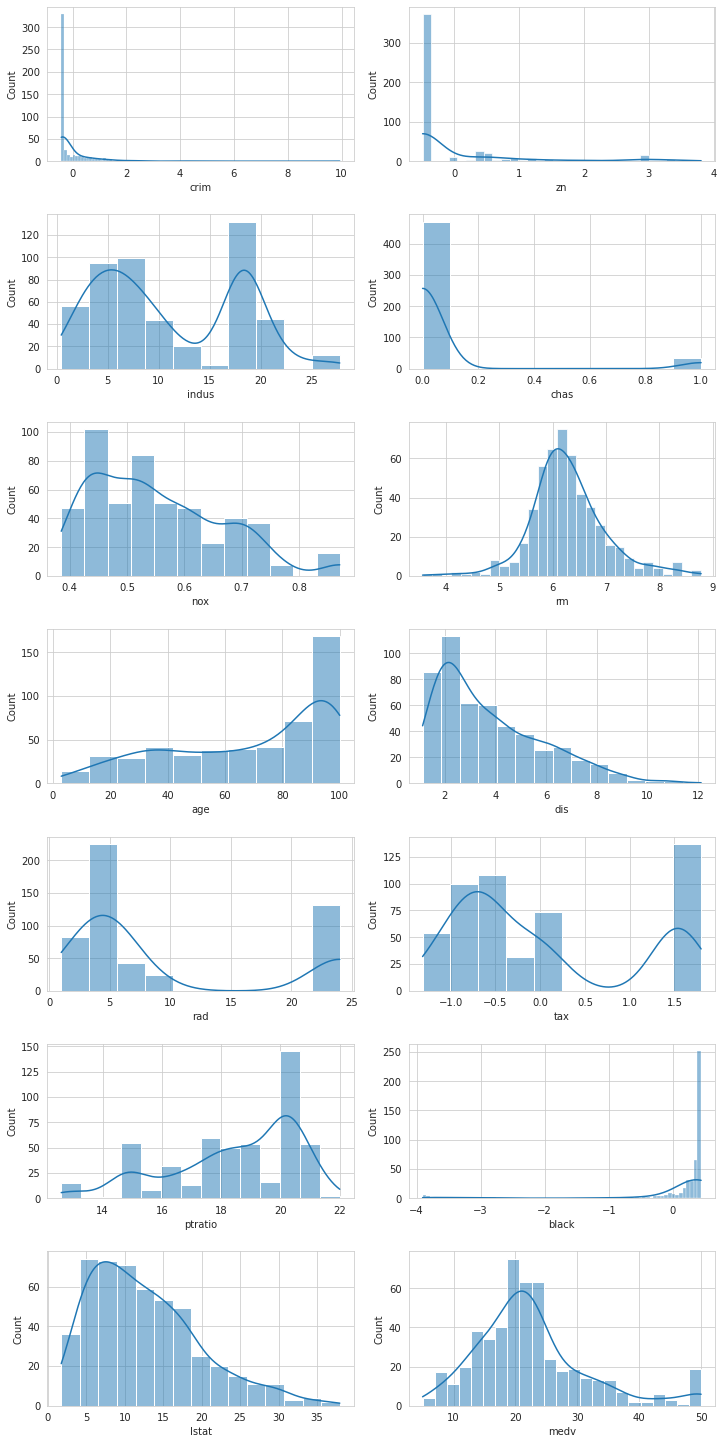

In [15]:
# DISTPLOT
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(10,20))
index = 0
axs = axes.flatten()

for col, value in df.items():
    sns.histplot(value, ax=axs[index], kde=True)
    index += 1
plt.tight_layout(pad=0.5, w_pad=1.0, h_pad=2.0)

<AxesSubplot:>

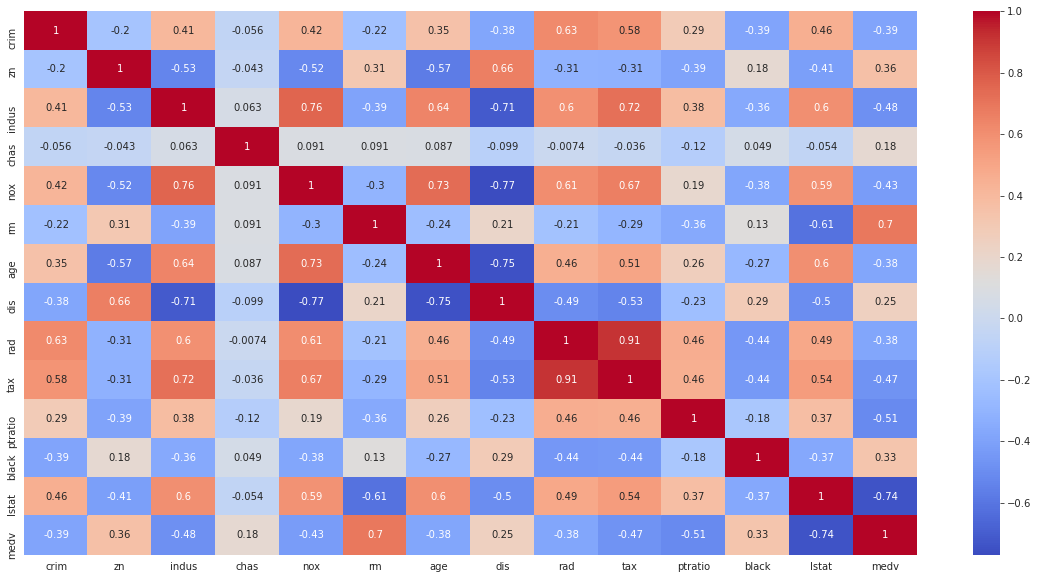

In [16]:
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

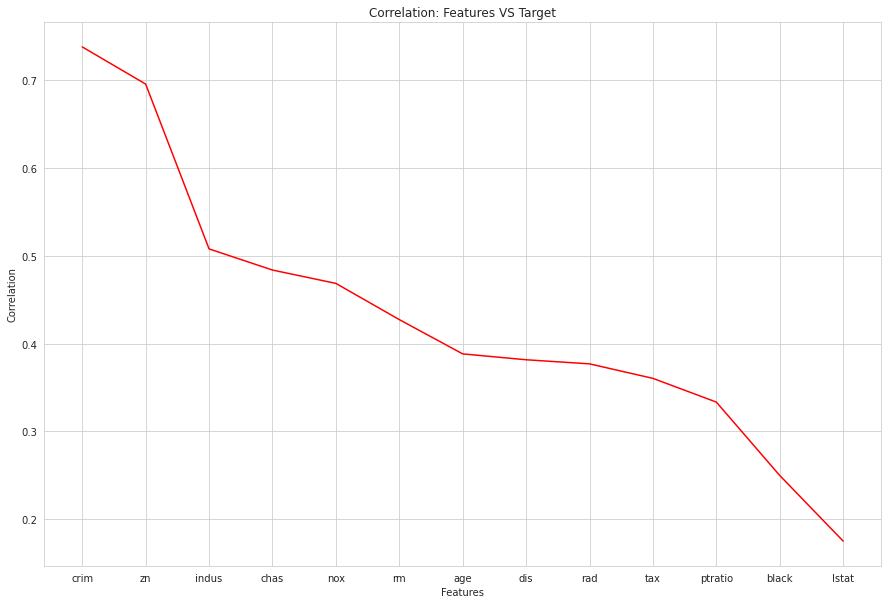

In [17]:
plt.figure(figsize=(15,10))
plt.plot(df.columns[:-1], abs(corr.loc['medv'][:-1]).sort_values(ascending=False), color='r')
plt.ylabel('Correlation')
plt.xlabel('Features')
plt.title('Correlation: Features VS Target')
plt.show()

The features, lstat & rm are highly corelated with target variable (medv).
Further, rad & tax are highly corelated, thus we have to select either of them for prediction as selecting both can affect model accuracy.

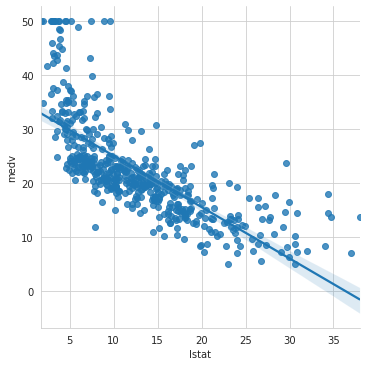

In [18]:
sns.lmplot(y='medv', x='lstat', data=df)

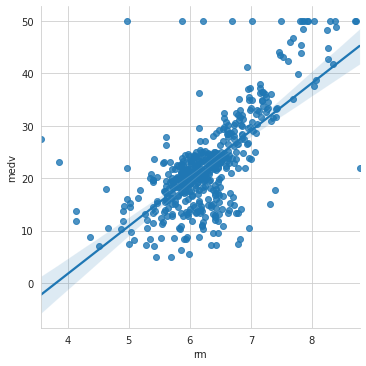

In [19]:
sns.lmplot(y='medv', x='rm', data=df)

In [20]:
#Splitting dataset
X = df.drop(['medv', 'rad'], axis=1)
Y = df['medv']

In [21]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [22]:
model = LinearRegression()
model.fit(x_train, y_train)
model.coef_

array([-8.52719058e-01,  6.30631316e-01, -9.22648695e-03,  3.54681363e+00,
       -1.33041252e+01,  4.27320426e+00, -1.47242256e-02, -1.35463018e+00,
        3.41479935e-01, -8.23971325e-01,  1.00435991e+00, -5.38905493e-01])

In [23]:
model.intercept_

31.063455824830246

In [24]:
pred = model.predict(x_test)

In [25]:
print("R2 Score: ", mt.r2_score(y_test, pred))
print("MAE: ", mt.mean_absolute_error(y_test, pred))
print("MSE: ", mt.mean_squared_error(y_test, pred))
print("RMSE: ", np.sqrt(mt.mean_squared_error(y_test, pred)))

R2 Score:  0.6883010754490944
MAE:  3.285644397541588
MSE:  23.22565175346301
RMSE:  4.81929992358465


In [26]:
coeff = pd.DataFrame(model.coef_, x_train.columns, columns=["Coefficient"])

<AxesSubplot:>

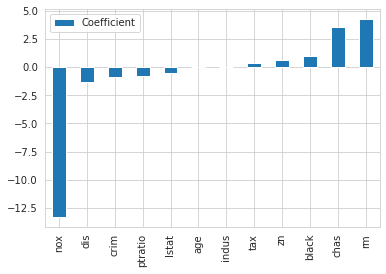

In [27]:
coeff.sort_values(by='Coefficient').plot(kind='bar')

From the above bar plot, we understand that the __RM__ has higher positive coefficient & __NOX__ has higher negative coefficient. <br>
___OBSERVATIONS___<br>
- With an increase in __RM__ the __MEDV__ will increase with a factor of 4.27
- Similarly, with increase in __NOX__ the __MEDV__ will decrease with a factor of 13.304